In [1]:
# import relevant libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### Web scrapping british airways review data from the www.airlinequality.com wesite

In [2]:
# scrapping data from 20 pages of size 100 from the site
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100
reviews = []
# for i in range(1, pages + 1)
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
 # Create URL to collect links from paginated data\n",
url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
# Collect HTML data from this page\n",
response = requests.get(url)
 # Parse content\n",
content = response.content
parsed_content = BeautifulSoup(content, 'html.parser')
for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())
print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
   ---> 100 total reviews


In [3]:
# selecting reviews
df = pd.DataFrame()
df["reviews"] = reviews
df.head(20)

reviews
0   ✅ Verified Review |  Travelled British Airways...
1   ✅ Verified Review |  Athens to London return. ...
2   ✅ Verified Review |  Manchester to Los Angeles...
3   ✅ Verified Review |  Manchester to Las Vegas v...
4   ✅ Verified Review |  Miami to London Business ...
5   ✅ Verified Review |  I've flown this route (Sy...
6   ✅ Verified Review |  Paris CDG to Bangkok via ...
7   ✅ Verified Review |  London Heathrow to Hong K...
8   ✅ Verified Review |  Toronto to London return ...
9   ✅ Verified Review |  London Heathrow to Lima. ...
10  ✅ Verified Review |  On my way home on 1st Jan...
11  ✅ Verified Review |  Stockholm to Denver via L...
12  ✅ Verified Review |  London Heathrow to Tehran...
13  ✅ Verified Review |  Cancun to London Gatwick ...
14  ✅ Verified Review |  Madrid to Montreal via Lo...
15  ✅ Verified Review |  Having read so many negat...
16  Flew London Gatwick to Tampa with British Airw...
17  ✅ Verified Review |  My family and I were flyi...
18  ✅ Verified Review |  Los Angeles to London Hea...
19  ✅ Verified Review |  BA 869 from Budapest on 1...

In [4]:
first_row = df.iloc[0]
first_row

reviews    ✅ Verified Review |  Travelled British Airways...
Name: 0, dtype: object

In [5]:
# Split string column into two new columns
df[['Review Status', 'Review']] = df.reviews.str.split("|", expand = True)
df.head()

reviews       Review Status  \
0  ✅ Verified Review |  Travelled British Airways...  ✅ Verified Review    
1  ✅ Verified Review |  Athens to London return. ...  ✅ Verified Review    
2  ✅ Verified Review |  Manchester to Los Angeles...  ✅ Verified Review    
3  ✅ Verified Review |  Manchester to Las Vegas v...  ✅ Verified Review    
4  ✅ Verified Review |  Miami to London Business ...  ✅ Verified Review    

                                              Review  
0    Travelled British Airways from London to Kua...  
1    Athens to London return. entire experience w...  
2    Manchester to Los Angeles via Heathrow. I'm ...  
3    Manchester to Las Vegas via Manchester. I we...  
4    Miami to London Business Class. Living in Lo...

In [6]:
# drop the unneccessary column
df.drop(columns=['reviews'], axis=1, inplace=True)
df.head()

Review Status                                             Review
0  ✅ Verified Review     Travelled British Airways from London to Kua...
1  ✅ Verified Review     Athens to London return. entire experience w...
2  ✅ Verified Review     Manchester to Los Angeles via Heathrow. I'm ...
3  ✅ Verified Review     Manchester to Las Vegas via Manchester. I we...
4  ✅ Verified Review     Miami to London Business Class. Living in Lo...

In [7]:
first_row1 = df.iloc[0]
first_row1

Review Status                                   ✅ Verified Review 
Review             Travelled British Airways from London to Kua...
Name: 0, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review Status  100 non-null    object
 1   Review         75 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [9]:
# check missing values
df.isnull().sum()

Review Status     0
Review           25
dtype: int64

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Review Status    0
Review           0
dtype: int64

In [12]:
df['Review Status'].value_counts()

Review Status
✅ Verified Review     75
Name: count, dtype: int64

### Topic modelling

In [13]:
# import necessary libraries
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel,LdaModel, LsiModel, HdpModel
from pprint import pprint
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
# NLTK Stop words
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

In [15]:
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']
          

In [28]:
stop_words.extend(st1)

In [29]:
bg = df[df["Review Status"] == '✅ Verified Review']

In [30]:
# Convert to list
df1 = df.Review.values.tolist()

df1 = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df1 = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df1 = [re.sub("\'", "", sent) for sent in df]

pprint(df1[:1])

['Review Status']


In [31]:
df1 = [re.sub("-", " ", sent) for sent in df]
df1 = [re.sub(":", "", sent) for sent in df]

In [32]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df1))

In [33]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [34]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB','ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [35]:
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm

doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [36]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [37]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [38]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('review', 1), ('status', 1)]]

In [39]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [40]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.500*"review" + 0.500*"status"'),
 (1, '0.500*"review" + 0.500*"status"'),
 (2, '0.880*"review" + 0.120*"status"'),
 (3, '0.500*"review" + 0.500*"status"'),
 (4, '0.570*"status" + 0.430*"review"')]


In [41]:
 # Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -1.6444851756095886

Coherence Score:  0.7071067811865476


In [42]:
# define a function that would plot a bar graph of n most frequent words in the data.
import seaborn as sns
from nltk import FreqDist

# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


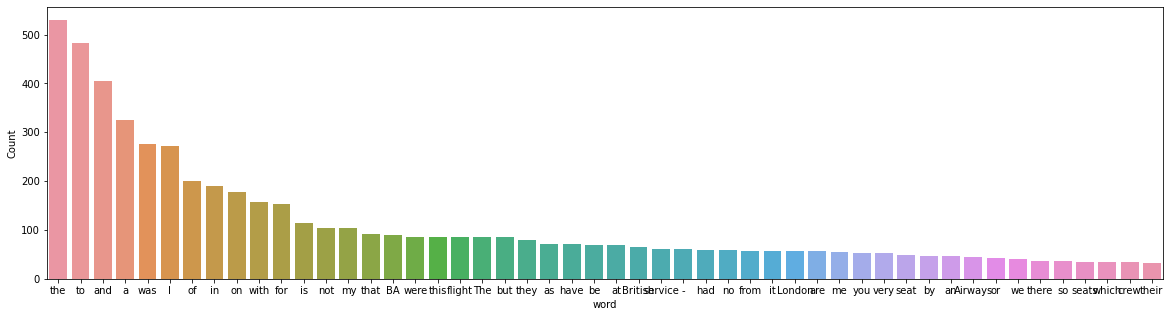

In [43]:
# top 50 frequent words
freq_words(df['Review'], 50)

In [44]:
# tokenize the reviews 
tokenized_reviews = pd.Series(df['Review']).apply(lambda x: x.split())
print(tokenized_reviews[1])

['Athens', 'to', 'London', 'return.', 'entire', 'experience', 'was', 'excellent,', 'although', 'due', 'to', 'bad', 'weather', 'conditions', 'in', 'London,', 'my', 'original', 'flight', 'was', 'cancelled', 'and', 'I', 'was', 'rebooked', 'on', 'another', 'one', '30', 'hours', 'later.', 'BA', 'compensated', 'my', 'first', 'night', 'stay,', 'I', 'got', 'a', 'room', 'upgrade', 'and', 'their', 'staff', 'kept', 'me', 'informed', 'on', 'the', 'difficult', 'situation.', 'The', 'aircraft', 'interior', 'was', 'clean', 'and', 'smart', 'and', 'the', 'crew', 'smiling,', 'polite', 'and', 'efficient!', 'Both', 'flights', 'on', 'time', 'and', 'the', 'meal', 'was', 'average.']


In [45]:
# then lemmatize the tokenized reviews
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['return', 'entire', 'experience', 'excellent', 'due', 'bad', 'weather', 'condition', 'original', 'flight', 'cancel', 'rebooke', 'hour', 'later', 'compensate', 'first', 'night', 'stay', 'get', 'room', 'upgrade', 'staff', 'keep', 'inform', 'difficult', 'situation', 'aircraft', 'interior', 'clean', 'smart', 'crew', 'smile', 'polite', 'efficient', 'flight', 'time', 'meal', 'average']


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


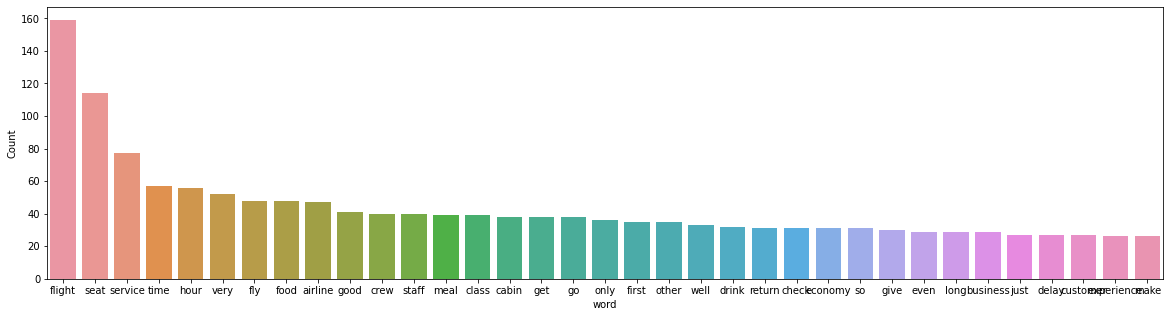

In [46]:
# de-tokenize the lemmatized reviews and plot 35 of the most common words
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['Review'] = reviews_3

freq_words(df['Review'], 35)

flight,seat,service and time are the top most common words.

In [64]:
# creating the term dictionary of our corpus, where every unique term is assigned an index
dictionary1 = corpora.Dictionary(reviews_2)

In [65]:
# convert the list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary1.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [66]:
# Build LDA model
lda_model1 = LDA(corpus=doc_term_matrix, id2word=dictionary1, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [67]:
# print out the topics that our LDA model has learned
lda_model1.print_topics()

[(0,
  '0.023*"seat" + 0.019*"flight" + 0.013*"service" + 0.012*"fly" + 0.010*"time" + 0.009*"very" + 0.009*"good" + 0.008*"airline" + 0.008*"class" + 0.007*"experience"'),
 (1,
  '0.019*"flight" + 0.013*"time" + 0.012*"good" + 0.012*"service" + 0.012*"crew" + 0.011*"return" + 0.008*"seat" + 0.008*"drink" + 0.008*"get" + 0.007*"very"'),
 (2,
  '0.025*"flight" + 0.014*"book" + 0.011*"hour" + 0.009*"staff" + 0.009*"service" + 0.008*"go" + 0.008*"get" + 0.008*"help" + 0.008*"take" + 0.007*"ticket"'),
 (3,
  '0.012*"fly" + 0.012*"flight" + 0.009*"crew" + 0.009*"seat" + 0.006*"inflight" + 0.006*"way" + 0.006*"ticket" + 0.006*"entertainment" + 0.006*"work" + 0.006*"try"'),
 (4,
  '0.024*"flight" + 0.017*"seat" + 0.014*"hour" + 0.011*"meal" + 0.010*"good" + 0.010*"offer" + 0.009*"only" + 0.009*"lounge" + 0.009*"food" + 0.009*"cabin"'),
 (5,
  '0.018*"seat" + 0.016*"very" + 0.012*"flight" + 0.010*"bag" + 0.009*"business" + 0.008*"class" + 0.007*"give" + 0.007*"crew" + 0.007*"fly" + 0.006*"bad"

In [68]:
from wordcloud import WordCloud

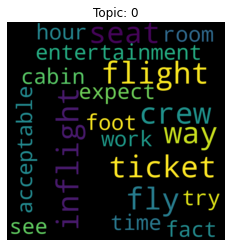

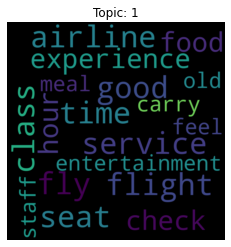

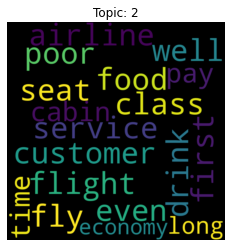

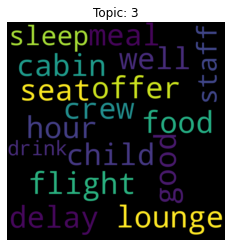

In [71]:
for topic_id, topic in enumerate(lda_model1.print_topics(num_topics=4, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [60]:
##Topics Visualization
##To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. This visualization is interactive in nature and displays topics along with the most relevant words.

# Visualize the topics
import pyLDAvis.gensim_models


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, doc_term_matrix, dictionary1)
pyLDAvis.show(vis, local=False)
pyLDAvis.save_html(vis, 'lda.html')

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [30/Nov/2023 14:48:08] "GET / HTTP/1.1" 200 -



stopping Server...


In [54]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [55]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=6, step=1)

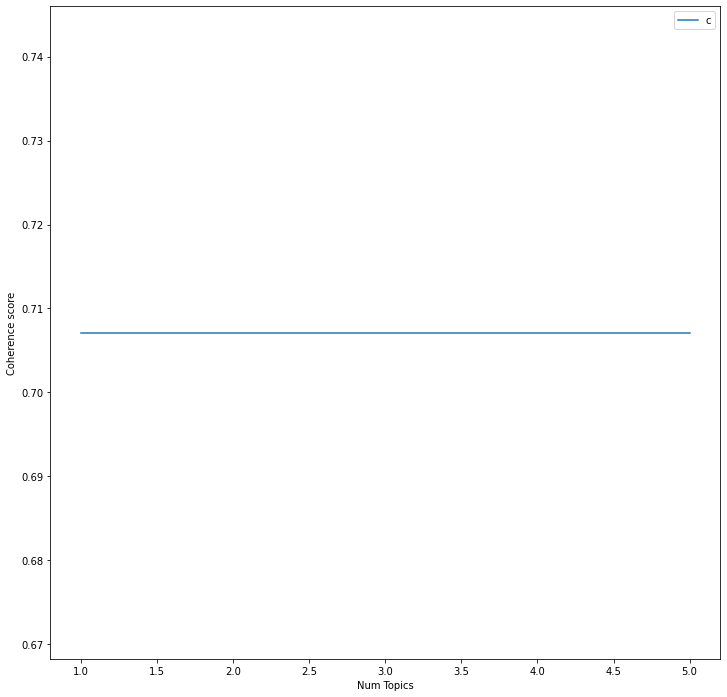

In [56]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [57]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.7071
Num Topics = 2  has Coherence Value of 0.7071
Num Topics = 3  has Coherence Value of 0.7071
Num Topics = 4  has Coherence Value of 0.7071
Num Topics = 5  has Coherence Value of 0.7071


In [58]:
# Select the model and print the topics

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0, '0.821*"review" + 0.179*"status"'),
 (1, '0.506*"review" + 0.494*"status"'),
 (2, '0.518*"review" + 0.482*"status"'),
 (3, '0.516*"review" + 0.484*"status"')]
